In [1]:
%%time
%pip install pandas scikit-learn matplotlib
%pip install torch==2.8.0+cpu torchvision==0.23.0+cpu torchaudio==2.8.0+cpu \
    --index-url https://download.pytorch.org/whl/cpu


Looking in indexes: https://download.pytorch.org/whl/cpu
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 75.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 68.1 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.10.0+cpu
    Uninstalling torch-2.10.0+cpu:
      Successfully uninstalled torch-2.10.0+cpu
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.25.0+cpu
    Uninstalling torchvision-0.25.0+cpu:
      Successfully uninstalled torchvision-0.25.0+cpu
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.10.0+cpu
    Uninstalling torchaudio-2.10.0+cpu:
      Successfully uninstalled torchaudio-2.10.0+cpu
CPU times: user 2.81 s, sys: 449 ms, total: 3.26 s
Wall time: 51.2 s


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('league_of_legends_data_large.csv')

In [6]:
df.head()e

,win,kills,deaths,assists,gold_earned,cs,wards_placed,wards_killed,damage_dealt
0,0,16,6,19,17088,231,11,7,15367
1,1,8,8,5,14865,259,10,2,38332
2,0,0,17,11,15919,169,14,5,24642
3,0,19,11,1,11534,264,14,3,15789
4,0,12,7,6,18926,124,15,7,40268


In [26]:
X = df.drop('win',axis=1)
y = df['win']
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = torch.tensor(X_train_scaled,  dtype=torch.float32)
X_test_scaled = torch.tensor(X_test_scaled, dtype=torch.float32)

y_train = torch.tensor(y_train.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)

In [27]:

class LogisticRegression(nn.Module):
  def __init__(self,input_dim):
    super(LogisticRegression,self).__init__()
    self.linear = nn.Linear(input_dim,1)

  def forward(self, x):
    yhat = torch.sigmoid(self.linear(x))
    return yhat


input_dim = X_train.shape[1]

model = LogisticRegression(input_dim)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(),lr=0.01)


In [29]:
epochs = 1000

for epoch in range(epochs):
  model.train()
  optimizer.zero_grad()
  outputs = model(X_train_scaled)
  loss = criterion(outputs, y_train.reshape(-1, 1))
  loss.backward()
  optimizer.step()
  if epoch % 100 == 0:
    print(f"Number of epoch {epoch}\nLoss:{loss}")

model.eval()
with torch.no_grad():
  # Get predictions on both training and test set
  y_predicted_train = model(X_train_scaled)
  y_predicted_test = model(X_test_scaled)

  # Convert probabilities to binary classes (0 or 1) using 0.5 threshold
  y_predicted_cls_train = y_predicted_train.round()
  y_predicted_cls_test = y_predicted_test.round()

  # Calculate accuracy
  acc_train = y_predicted_cls_train.eq(y_train.reshape(-1, 1)).sum() / float(y_train.shape[0])
  acc_test = y_predicted_cls_test.eq(y_test.reshape(-1, 1)).sum() / float(y_test.shape[0])

  print(f'Train Accuracy: {acc_train:.4f}')
  print(f'Test Accuracy: {acc_test:.4f}')

Number of epoch 0
Loss:0.7274628281593323
Number of epoch 100
Loss:0.7135449051856995
Number of epoch 200
Loss:0.7047030925750732
Number of epoch 300
Loss:0.6991819143295288
Number of epoch 400
Loss:0.6957687139511108
Number of epoch 500
Loss:0.6936693787574768
Number of epoch 600
Loss:0.6923801898956299
Number of epoch 700
Loss:0.6915882229804993
Number of epoch 800
Loss:0.6911007165908813
Number of epoch 900
Loss:0.6907998919487
Train Accuracy: 0.5400
Test Accuracy: 0.5400


In [31]:
epochs = 1000
optimizer = optim.SGD(model.parameters(),lr=0.01,weight_decay=0.01)
for epoch in range(epochs):
  model.train()
  optimizer.zero_grad()
  outputs = model(X_train_scaled)
  loss = criterion(outputs, y_train.reshape(-1, 1))
  loss.backward()
  optimizer.step()
  if epoch % 100 == 0:
    print(f"Number of epoch {epoch}\nLoss:{loss}")

model.eval()
with torch.no_grad():
  # Get predictions on both training and test set
  y_predicted_train = model(X_train_scaled)
  y_predicted_test = model(X_test_scaled)

  # Convert probabilities to binary classes (0 or 1) using 0.5 threshold
  y_predicted_cls_train = y_predicted_train.round()
  y_predicted_cls_test = y_predicted_test.round()

  # Calculate accuracy
  acc_train = y_predicted_cls_train.eq(y_train.reshape(-1, 1)).sum() / float(y_train.shape[0])
  acc_test = y_predicted_cls_test.eq(y_test.reshape(-1, 1)).sum() / float(y_test.shape[0])

  print(f'Train Accuracy: {acc_train:.4f}')
  print(f'Test Accuracy: {acc_test:.4f}')

Number of epoch 0
Loss:0.6903077960014343
Number of epoch 100
Loss:0.6903072595596313
Number of epoch 200
Loss:0.6903070211410522
Number of epoch 300
Loss:0.6903068423271179
Number of epoch 400
Loss:0.6903069019317627
Number of epoch 500
Loss:0.6903070211410522
Number of epoch 600
Loss:0.6903070211410522
Number of epoch 700
Loss:0.6903071403503418
Number of epoch 800
Loss:0.6903072595596313
Number of epoch 900
Loss:0.6903073191642761
Train Accuracy: 0.5213
Test Accuracy: 0.5350


In [34]:
model.eval()
with torch.no_grad():
    # Get probability predictions
    y_prob_train = model(X_train_scaled)
    y_prob_test = model(X_test_scaled)

    # Convert probabilities to binary classes
    y_pred_train = y_prob_train.round()
    y_pred_test = y_prob_test.round()

    # Convert to numpy arrays for evaluation metrics
    y_prob_train = y_prob_train.detach().numpy().flatten()
    y_prob_test = y_prob_test.detach().numpy().flatten()
    y_pred_train = y_pred_train.detach().numpy().flatten()
    y_pred_test = y_pred_test.detach().numpy().flatten()

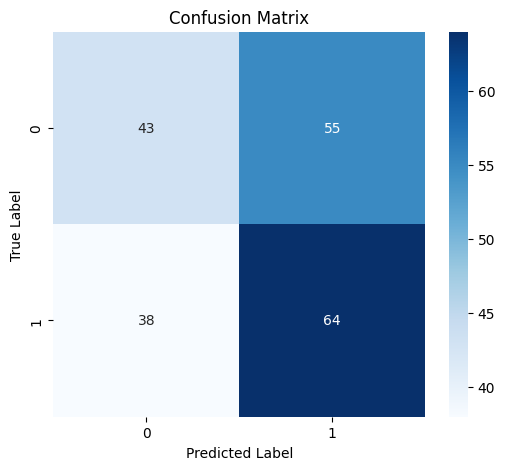

Classification Report:
              precision    recall  f1-score   support

         0.0       0.53      0.44      0.48        98
         1.0       0.54      0.63      0.58       102

    accuracy                           0.54       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.53      0.54      0.53       200



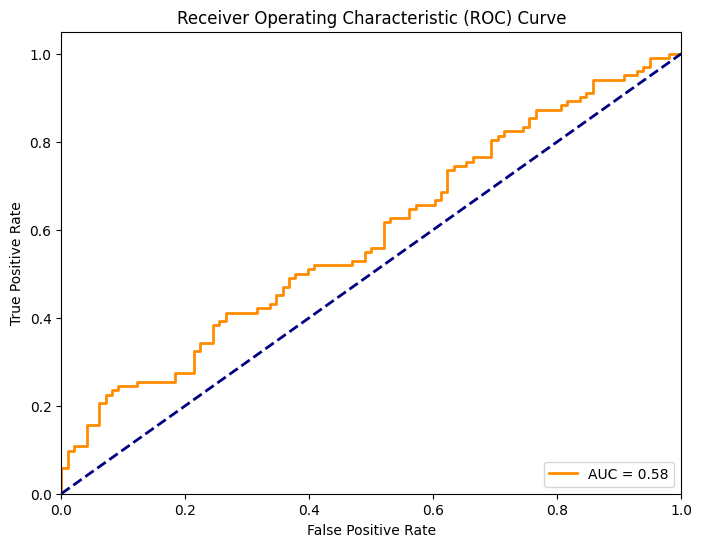

In [38]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns

# 2. Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# 3. Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 4. Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

# 5. Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_test)
roc_auc = auc(fpr, tpr)

# 6. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [39]:
# 1. Save the model's state dictionary
torch.save(model.state_dict(), 'logistic_regression_model.pth')
print("Model saved to 'logistic_regression_model.pth'")

# 2. Load the model
# Initialize a new model instance with the same input dimension
loaded_model = LogisticRegression(input_dim)

# Load the saved state dictionary
loaded_model.load_state_dict(torch.load('logistic_regression_model.pth'))
print("Model loaded successfully")

# 3. Evaluate the loaded model
loaded_model.eval()
with torch.no_grad():
    # Get predictions on the test set
    y_predicted_test_loaded = loaded_model(X_test_scaled)

    # Convert probabilities to binary classes
    y_predicted_cls_test_loaded = y_predicted_test_loaded.round()

    # Calculate accuracy
    acc_test_loaded = y_predicted_cls_test_loaded.eq(y_test.reshape(-1, 1)).sum() / float(y_test.shape[0])

    print(f'Test Accuracy of Loaded Model: {acc_test_loaded:.4f}')

Model saved to 'logistic_regression_model.pth'
Model loaded successfully
Test Accuracy of Loaded Model: 0.5350


In [41]:
learning_rates = [0.01, 0.05, 0.1]
results = {}

print("Starting Hyperparameter Tuning Loop...")

for lr in learning_rates:
    # a. Re-instantiate the model
    model_tuned = LogisticRegression(input_dim)

    # b. Re-instantiate the optimizer with the current learning rate
    # Note: We are using basic SGD here without weight decay for this specific comparison,
    # or we could keep weight_decay=0.01 if consistent with previous steps.
    # Let's stick to the prompt's implication of varying LR.
    optimizer = optim.SGD(model_tuned.parameters(), lr=lr)

    # c. Training loop for 100 epochs
    epochs = 100
    model_tuned.train()
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model_tuned(X_train_scaled)
        loss = criterion(outputs, y_train.reshape(-1, 1))
        loss.backward()
        optimizer.step()

    # d. Evaluation
    model_tuned.eval()
    with torch.no_grad():
        y_predicted_test = model_tuned(X_test_scaled)
        y_predicted_cls_test = y_predicted_test.round()
        acc_test = y_predicted_cls_test.eq(y_test.reshape(-1, 1)).sum() / float(y_test.shape[0])

    # f. Print and store results
    acc_test_val = acc_test.item()
    print(f"Learning Rate: {lr}, Test Accuracy: {acc_test_val:.4f}")
    results[lr] = acc_test_val

print("\nTuning Complete.")

Starting Hyperparameter Tuning Loop...
Learning Rate: 0.01, Test Accuracy: 0.4900
Learning Rate: 0.05, Test Accuracy: 0.4300
Learning Rate: 0.1, Test Accuracy: 0.5450

Tuning Complete.


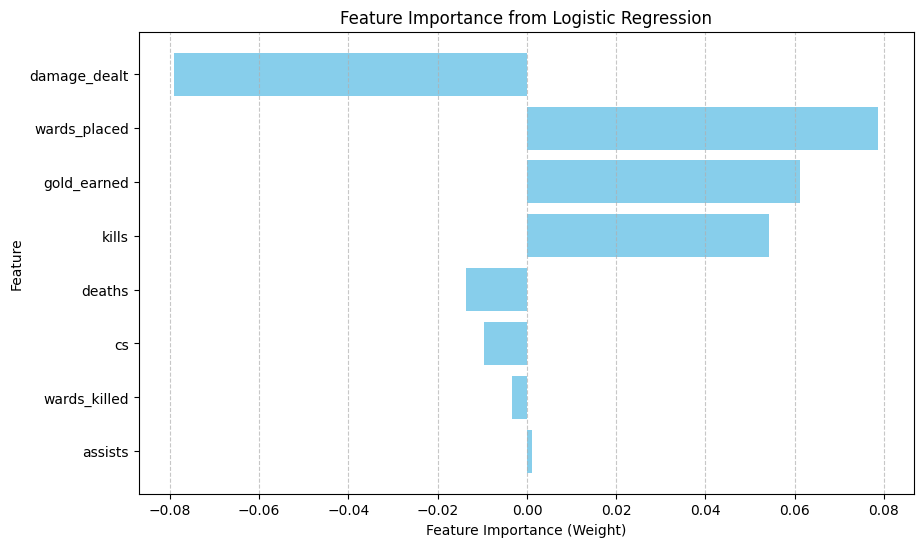

Feature Importance (sorted by magnitude):
        Feature  Importance
7  damage_dealt   -0.079120
5  wards_placed    0.078759
3   gold_earned    0.061158
0         kills    0.054145
1        deaths   -0.013708
4            cs   -0.009675
6  wards_killed   -0.003460
2       assists    0.001195


In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Extracting Model Weights
# The weights are in the 'linear' layer of our model
weights = model.linear.weight.detach().numpy().flatten()

# Get feature names from the original dataset (X)
feature_names = X.columns

# 2. Creating a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': weights
})

# 3. Sorting and Plotting Feature Importance
# Sort by absolute value of importance to see the most influential features
feature_importance_df['Abs_Importance'] = feature_importance_df['Importance'].abs()
feature_importance_df = feature_importance_df.sort_values(by='Abs_Importance', ascending=True)

# Plotting
plt.figure(figsize=(10, 6))
# Use the original Importance values for the plot to show direction (positive/negative)
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance (Weight)')
plt.ylabel('Feature')
plt.title('Feature Importance from Logistic Regression')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 4. Interpreting the Results
# Display the sorted dataframe
print("Feature Importance (sorted by magnitude):")
print(feature_importance_df[['Feature', 'Importance']].sort_values(by='Importance', ascending=False, key=abs))